In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv("data/ModelData.csv")
df

,SMILES,GPCR_act,MR,ATOM,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski_Drug-like,Lipinski_Not Drug-like,Veber_Drug-like,Veber_Not Drug-like,Ghose_Drug-like,Ghose_Not Drug-like
0,[H]c1nc(C([H])(C#N)c2nc3c([H])c([H])c([H])c([H...,0.251053,79.0614,22,293.286,2.53198,5.0,0.0,97.64,3.0,3.0,2.0,0.545599,1,0,1,0,1,0
1,[H]c1c([H])c(-n2c(=O)n3n(c2=O)C([H])([H])C([H]...,0.129006,63.4810,18,249.245,0.73360,2.0,0.0,48.93,1.0,2.0,0.0,0.747875,1,0,1,0,0,1
2,[H]O[C@]1(c2c([H])oc([H])c2[H])OC(=O)C([H])=C2...,0.798935,125.4138,35,482.573,4.45350,7.0,1.0,103.04,2.0,1.0,1.0,0.621189,1,0,1,0,0,1
3,[H]C1([H])C(=O)N2C([H])([H])[C@]3([H])C([H])([...,0.034461,70.1610,18,248.370,1.87170,2.0,0.0,23.55,0.0,0.0,0.0,0.653212,1,0,1,0,0,1
4,[H]OC1([H])C([H])(c2c([H])nn([H])c2C(=O)N([H])...,0.064913,50.9694,15,211.221,-0.42310,4.0,3.0,101.23,2.0,1.0,0.0,0.617763,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88873,[H]OC([H])([H])C1=C([H])C([H])([H])[C@]2([H])C...,0.925964,88.2856,22,304.474,3.91860,2.0,2.0,40.46,1.0,0.0,1.0,0.720902,1,0,1,0,1,0
88874,[H]OC(=O)C([H])([H])N([H])C(=O)C1(N([H])C(=O)C...,0.113655,59.0416,17,243.263,-1.42510,5.0,4.0,121.52,5.0,0.0,0.0,0.471624,1,0,1,0,0,1
88875,[H]OC(=O)c1c([H])n(O[H])c([H])c([H])/c1=N\c1c(...,0.271177,60.2408,17,230.223,1.65600,3.0,2.0,74.82,2.0,2.0,1.0,0.770170,1,0,1,0,0,1
88876,[H]c1c([H])c([H])c(S(=O)(=O)On2c(=O)c3sc(C([H]...,0.250121,79.4455,22,339.354,0.27222,6.0,1.0,111.12,3.0,3.0,0.0,0.733170,1,0,1,0,1,0


# GLM

### Model 1: Just molecular features

For the first model - only the 10 molecular features as predictors

#### Normalizing and Splitting Data

In [3]:
X_mol = df.filter(['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS']).copy()
y = df['GPCR_act']

# normalizing X_mol
norm_X_mol = normalize(X_mol, axis = 0)

# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_mol_train, X_mol_rem, y_train, y_rem = train_test_split(norm_X_mol, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_mol_valid, X_mol_test, y_valid, y_test = train_test_split(X_mol_rem, y_rem, test_size=0.5)

#### Creating the Model

In [4]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg = LinearRegression().fit(X_mol_train, y_train)

# returns the coefficient of determination, aka R-squared value
reg.score(X_mol_train,y_train)

# get the coefficients and intercept of our model
reg.coef_
reg.intercept_

0.07138924780674283

#### Plotting Model Performance

In [5]:
# Graph model predictions vs actual activity scores
preds=reg.predict(X_mol_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds=preds.reshape(-1,1)

# finding the mean abs error
mae=[]
for i in range(0,len(preds)):
    mae.append(metrics.mean_absolute_error(y_valid[i],preds[i]))

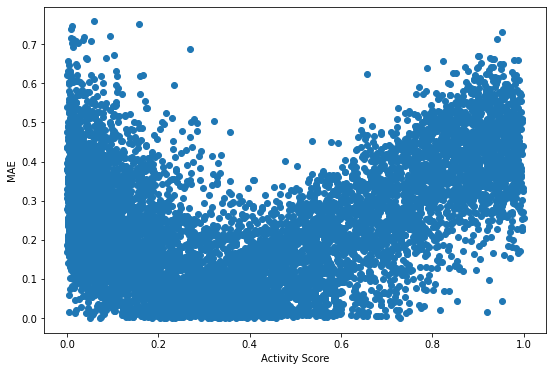

In [6]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae)

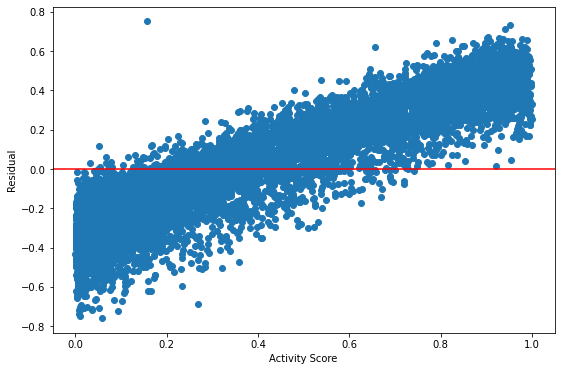

In [7]:
# Making a residual plot
resid=y_valid-preds
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid)

### Model 2 : Just Drug-Likeness Features

#### Splitting Data

In [8]:
# Split data first
X_dl = df.drop(['SMILES', 'GPCR_act','MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS'], axis = 1)
y = df['GPCR_act']

# Split data into training, validating, testing (80:10:10)
train_size=0.8

# This splits the training data (.8) and the remaining data
X_dl_train, X_dl_rem, y_train, y_rem = train_test_split(X_dl, y, train_size=0.8)

# split the remaining data 50/50 for validation and testing
test_size = 0.5

# Splitting the remaining .2 of the data into test and validation
X_dl_valid, X_dl_test, y_valid, y_test = train_test_split(X_dl_rem, y_rem, test_size=0.5)

In [9]:
X_dl

,QED,Lipinski_Drug-like,Lipinski_Not Drug-like,Veber_Drug-like,Veber_Not Drug-like,Ghose_Drug-like,Ghose_Not Drug-like
0,0.545599,1,0,1,0,1,0
1,0.747875,1,0,1,0,0,1
2,0.621189,1,0,1,0,0,1
3,0.653212,1,0,1,0,0,1
4,0.617763,1,0,1,0,0,1
...,...,...,...,...,...,...,...
88873,0.720902,1,0,1,0,1,0
88874,0.471624,1,0,1,0,0,1
88875,0.770170,1,0,1,0,0,1
88876,0.733170,1,0,1,0,1,0


#### Creating the Model

In [10]:
# Making the GLM model with 10 molecular features as preditors (no drug-likeness)
reg2 = LinearRegression().fit(X_dl_train, y_train)

# returns the coefficient of determination, aka R-squared value
reg2.score(X_dl_train,y_train)

# get the coefficients and intercept of our model
reg2.coef_
reg2.intercept_

1829151525751.757

#### Plotting Model Performance

In [11]:
# Graph model predictions vs actual activity scores
preds2=reg2.predict(X_dl_valid)
len(preds)==len(y_valid)

# reshape arrays b/c god knows why
y_valid=np.array(y_valid).reshape(-1,1)
preds2=preds2.reshape(-1,1)

# finding the mean abs error
mae2=[]
for i in range(0,len(preds2)):
    mae2.append(metrics.mean_absolute_error(y_valid[i],preds2[i]))

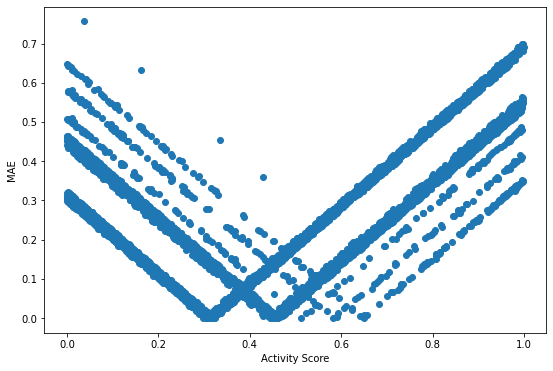

In [12]:
# Making a MAE plot
plt.figure(figsize=(9,6))
plt.xlabel("Activity Score")
plt.ylabel("MAE")
mae_plot=plt.scatter(x=y_valid,y=mae2)

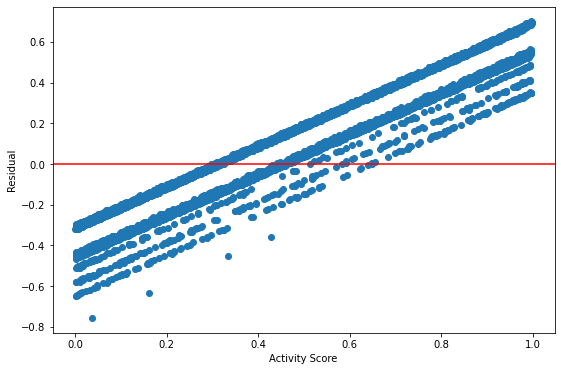

In [13]:
# making a residual plot
resid2=y_valid-preds2
plt.figure(figsize=(9,6))
plt.axhline(y=0,color='red')
plt.xlabel("Activity Score")
plt.ylabel("Residual")
res_plot=plt.scatter(x=y_valid,y=resid2)

# Random Forest
Built to predict the actual value of GPCR_act; includes dummy variables for drug-likeness

In [14]:
labels=np.array(df['GPCR_act'])

df_features=df.drop(['GPCR_act','SMILES'],axis=1)

features_list=list(df.columns)
features_list.remove('GPCR_act')
features_list.remove('SMILES')

features_arr=np.array(df_features)

In [15]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size = 0.25, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (66658, 17)
Training Labels Shape: (66658,)
Testing Features Shape: (22220, 17)
Testing Labels Shape: (22220,)


In [17]:
# The baseline predictions are the historical averages
baseline_preds = labels.mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.28


In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.23


In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -432.04 %.


In [21]:
print("Model accuracy:",rf.score(test_features,test_labels) * 100,"%")

Model accuracy: 22.01916438332513 %


In [22]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = features_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
# graph.write_png('tree.png')

## Random Forest with Classifiers + No Dummy Variables

Continuous variables only; does not include dummy variables for drug-likeness

In [23]:
threshold=[]
for i in range(0,len(df)):
    if df.loc[i,'GPCR_act']>0.5000000000000:
        threshold.append("Active")
    elif df.loc[i,'GPCR_act']<0.5000000000000:
        threshold.append("Inactive")
    else: threshold.append(None)
       

In [24]:
df_class=df
df_class['GPCR_act']=threshold

In [25]:
class_labels=np.array(df_class['GPCR_act'])

df_class_features=df_class.filter(['MR', 'ATOM', 'MW', 'ALOGP', 'HBA', 'HBD', 'PSA', 'ROTB', 'AROM', 'ALERTS', 'QED'],axis=1)

class_features_list=list(df_class_features.columns)

class_features_arr=np.array(df_class_features)

In [26]:
# Split the data into training and testing sets
cl_train_features, cl_test_features, cl_train_labels, cl_test_labels = train_test_split(class_features_arr, class_labels, test_size = 0.25, random_state = 42)

In [27]:
print('Training Features Shape:', cl_train_features.shape)
print('Training Labels Shape:', cl_train_labels.shape)
print('Testing Features Shape:', cl_test_features.shape)
print('Testing Labels Shape:', cl_test_labels.shape)

Training Features Shape: (66658, 11)
Training Labels Shape: (66658,)
Testing Features Shape: (22220, 11)
Testing Labels Shape: (22220,)


In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
cl_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
cl_rf.fit(cl_train_features, cl_train_labels);

In [29]:
# Use the forest's predict method on the test data
cl_pred = cl_rf.predict(cl_test_features)

In [30]:
print("Model accuracy:", metrics.accuracy_score(cl_test_labels, cl_pred) * 100, '%')

Model accuracy: 70.0945094509451 %


Text(0.5, 0, 'Random Forest Feature Importance')

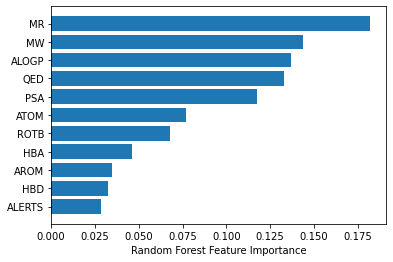

In [31]:
# Get feature importance and create bar plot
sorted_idx = cl_rf.feature_importances_.argsort()
plt.barh(np.array(class_features_list)[sorted_idx], cl_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [32]:
# Table of feature importances
feat_importance = pd.DataFrame({'Variable': class_features_list,
              'Importance': cl_rf.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop = True)
feat_importance

,Variable,Importance
0,MR,0.182042
1,MW,0.143701
2,ALOGP,0.136971
3,QED,0.132725
4,PSA,0.117693
5,ATOM,0.077152
6,ROTB,0.067992
7,HBA,0.046085
8,AROM,0.034469
9,HBD,0.032605


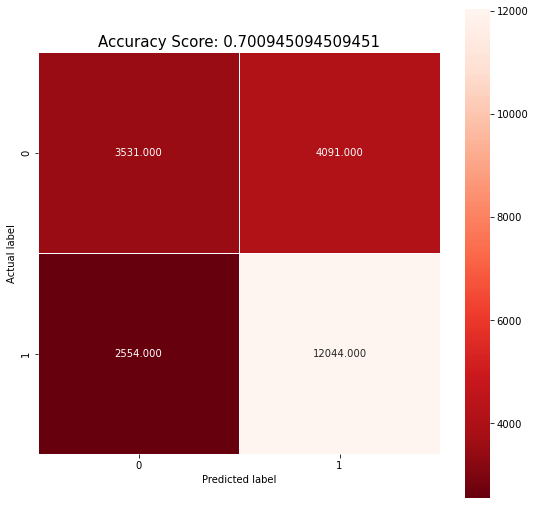

In [33]:
# Making a nice confusion matrix image
cl_score = metrics.accuracy_score(cl_test_labels, cl_pred)
cl_cm = metrics.confusion_matrix(cl_test_labels, cl_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cl_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cl_score)
plt.title(all_sample_title, size = 15);

In [34]:
# ROC curve
from sklearn import svm
clf = svm.SVC(random_state = 42)
clf.fit(cl_train_features, cl_train_labels)
SVC(random_state = 42)
metrics.plot_roc_curve(clf, cl_test_features, cl_test_labels) 
plt.show()

NameError: name 'SVC' is not defined

## Random Forest with Classifier + Dummy Variables

Includes continuous features and dummy variables for drug-likeness

In [ ]:
d_class_labels=np.array(df_class['GPCR_act'])

d_df_class_features=df_class.drop(['SMILES', 'GPCR_act'],axis=1)

d_class_features_list=list(d_df_class_features.columns)

d_class_features_arr=np.array(d_df_class_features)

In [ ]:
# Split the data into training and testing sets
d_cl_train_features, d_cl_test_features, d_cl_train_labels, d_cl_test_labels = train_test_split(d_class_features_arr, d_class_labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', d_cl_train_features.shape)
print('Training Labels Shape:', d_cl_train_labels.shape)
print('Testing Features Shape:', d_cl_test_features.shape)
print('Testing Labels Shape:', d_cl_test_labels.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
d_cl_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
d_cl_rf.fit(d_cl_train_features, d_cl_train_labels);

In [ ]:
# Use the forest's predict method on the test data
d_cl_pred = d_cl_rf.predict(d_cl_test_features)

In [ ]:
print("Model accuracy:", metrics.accuracy_score(d_cl_test_labels, d_cl_pred) * 100, '%')

In [ ]:
# Get feature importance and create bar plot
d_sorted_idx = d_cl_rf.feature_importances_.argsort()
plt.barh(np.array(d_class_features_list)[d_sorted_idx], d_cl_rf.feature_importances_[d_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# Table of feature importances
d_feat_importance = pd.DataFrame({'Variable': d_class_features_list,
              'Importance': d_cl_rf.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop = True)
d_feat_importance

In [ ]:
# Confusion matrix
d_cl_score = metrics.accuracy_score(d_cl_test_labels, d_cl_pred)
d_cl_cm = metrics.confusion_matrix(d_cl_test_labels, d_cl_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cl_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(d_cl_score)
plt.title(all_sample_title, size = 15);

In [ ]:
# ROC curve
d_clf = svm.SVC(random_state = 42)
d_clf.fit(d_cl_train_features, d_cl_train_labels)
SVC(random_state = 42)
metrics.plot_roc_curve(d_clf, d_cl_test_features, d_cl_test_labels) 
plt.show()

## Logistic Regression - No Dummy Variables

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(class_features_arr, class_labels, test_size = 0.25, random_state = 42)

In [ ]:
# Fitting the model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [ ]:
# Make predictions
predictions = logisticRegr.predict(x_test)

In [ ]:
# Using score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print("Accuracy:",score)

In [ ]:
# Making a nice confusion matrix image
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#define metrics
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="Inactive")
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(-fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Things to do 
- Create and evaluate 2 k-nearest neighbors classifier with k=3 and k=4
- Create visualisations based on our best model - Random forest with classifiers (no dummies)
- Presentations
    - 